# Classification new using Naive-Bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.random.seed(123456)

In [2]:
!ls

 comment_spam.csv    doc.pdf	 'News Title.xls'   'Task Data Scientist.doc'
'Comment Spam.xls'   news.csv	  spam-Copy1.ipynb
 doc.doc	     news.ipynb   spam.ipynb


# Read Dataset

In [3]:
news = pd.read_csv('news.csv')

In [4]:
news.tail()

,No,News Title,Category
65530,65531,Xbox One Homebrew Will Likely Be a Reality in ...,Technology
65531,65532,Maker Recalls 1.9 Million Rear-Facing Infant S...,Technology
65532,65533,Watch first 'Ninja Turtles' trailer,Entertainment
65533,65534,23/05/2014Dogs triumph in Cannes as canine thr...,Entertainment
65534,65535,FrontPoint Security CEO Chris Villar Ranked No...,Business


In [5]:
news['Category'].unique()

array(['Technology', 'Business', 'Entertainment', 'Medical'], dtype=object)

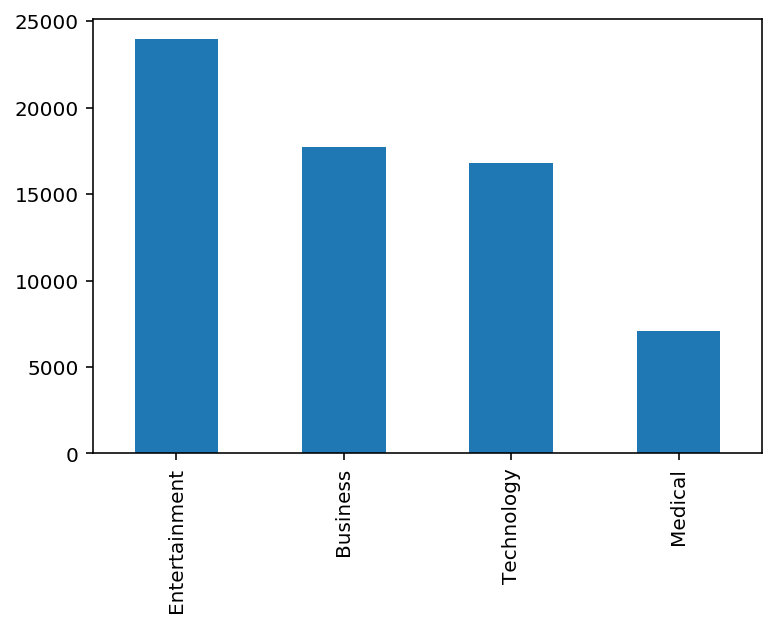

In [6]:
news['Category'].value_counts().plot(kind='bar')
plt.show()

# Data Normalize

In [7]:
import re
import string

def clean_text(s):
    s = s.lower()
    for ch in string.punctuation:                                                                                                     
        s = s.replace(ch, " ") 
    s = re.sub("[0-9]+", "||DIG||",s)
    s = re.sub(' +',' ', s)        
    return s

news['CLEAN'] = [clean_text(s) for s in news['News Title']]
#news['TEXT']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [9]:
# pull the data into vectors
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(news['CLEAN'])

# for Tfidf (we have tried and the results aren't better)
#tfidf = TfidfVectorizer()
#x = tfidf.fit_transform(dataset['TEXT'].values)

encoder = LabelEncoder()
y = encoder.fit_transform(news['Category'])

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(52428, 26383)
(52428,)
(13107, 26383)
(13107,)


# Train and Check Naive bayes model

In [10]:
%%time
nb = MultinomialNB()
nb.fit(x_train, y_train)
results_nb_cv = cross_val_score(nb, x_train, y_train, cv=10)
test_acc = nb.score(x_test, y_test)
print('Cross Validation: ', results_nb_cv.mean())
print('Test data Acc: ',test_acc)

Cross Validation:  0.907244364718094
Test data Acc:  0.910429541466392
CPU times: user 602 ms, sys: 76.9 ms, total: 679 ms
Wall time: 461 ms


In [11]:
x_test_pred = MultinomialNB().fit(x_train, y_train).predict(x_test)
confusion_matrix(y_test, x_test_pred)

array([[3177,   96,   47,  260],
       [  73, 4499,   42,  102],
       [  85,   56, 1196,   47],
       [ 248,   80,   38, 3061]])

In [12]:
print(classification_report(y_test, x_test_pred, target_names=encoder.classes_))

               precision    recall  f1-score   support

     Business       0.89      0.89      0.89      3580
Entertainment       0.95      0.95      0.95      4716
      Medical       0.90      0.86      0.88      1384
   Technology       0.88      0.89      0.89      3427

    micro avg       0.91      0.91      0.91     13107
    macro avg       0.91      0.90      0.90     13107
 weighted avg       0.91      0.91      0.91     13107



# Try to predict news

In [13]:
def predict_cat(title):
    #cat_names = {'b' : 'business', 't' : 'science and technology', 'e' : 'entertainment', 'm' : 'health'}
    cat_names = {'Technology' : 'Technology News', 'Business' : 'Business News', 'Entertainment' : 'Entertainment News', 'Medical' : 'Medical News'}
    cod = MultinomialNB().fit(x_train, y_train).predict(vectorizer.transform([title]))
    return cat_names[encoder.inverse_transform(cod)[0]]

In [14]:
news['Category'].unique()

array(['Technology', 'Business', 'Entertainment', 'Medical'], dtype=object)

In [15]:
predict_cat('John wick 3 has failed to get attentions')

'Entertainment News'

In [16]:
predict_cat('The drama surrounding Google and Huawei\'s new phone – explained')

'Technology News'

In [17]:
predict_cat('China starts to impose additional tariffs on some U.S. goods')

'Business News'